[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion07_NotasE_UDIBONO.ipynb)

# UDIBONOS

In [ ]:
# Ejemplo de instalalción
# !pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

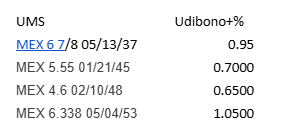

## Trato de fechas:

In [ ]:
vencimiento = pd.to_datetime("05-04-2053", format='%m-%d-%Y')
vencimiento

Timestamp('2053-05-04 00:00:00')

In [ ]:
proximo_pago = pd.to_datetime("05-04-2025", format='%m-%d-%Y') + pd.to_timedelta('182 days')
proximo_pago

Timestamp('2025-11-02 00:00:00')

In [ ]:
hoy = pd.to_datetime("today").normalize()
hoy

Timestamp('2025-05-19 00:00:00')

In [ ]:
# Variables dadas (ejemplo)
Tasa_udi = 0.04                                 # Jugaremos con esta variable, sobre el pago de cupon
T_c = 0.0105 + Tasa_udi                         # tasa cupón anual (1.05%)
T_r = 0.05                                      # tasa real YTM anual (5%)
C = np.ceil((vencimiento - hoy).days/182)       # número de cupones restantes
DCV = (proximo_pago - hoy).days                 # días hasta próximo cupón
PCV = 182                                       # periodo del cupón (días)
VN = 100                                        # valor nominal en UDIs

In [ ]:
C, DCV

(np.float64(57.0), 167)

# Fórmula de precio limpio de un UDIBONO

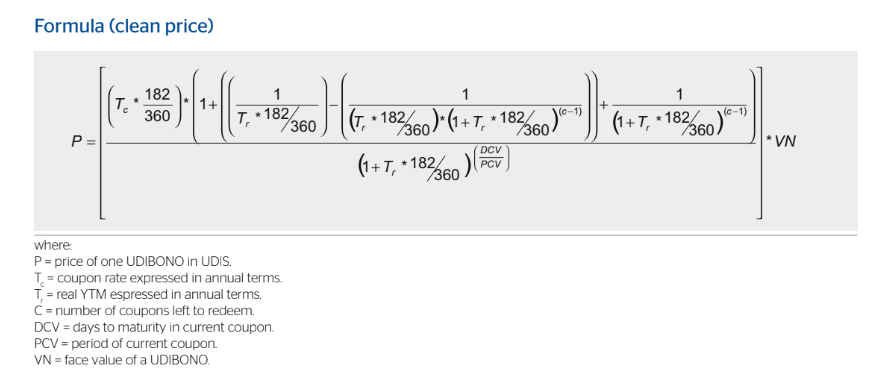

In [ ]:
def precio_en_udis(T_c, T_r, C, DCV, PCV, VN):
  valor_a = 1/(T_r*182/360)
  valor_b = 1/(1 + T_r*182/360)**(C-1)
  numerador = (T_c * 182/360)*(1 + (valor_a - valor_a*valor_b) + valor_b)
  denominador = (1 + T_r*(182/360))**(DCV/PCV)
  precio_en_udis = numerador/denominador
  precio_en_udis = precio_en_udis*VN
  return precio_en_udis

In [ ]:
precio_en_udis(T_c, T_r, C, DCV, PCV, VN)

np.float64(77.4326200379319)

Guardemoslo en una variable:

In [ ]:
precio_bono_en_udis = precio_en_udis(T_c, T_r, C, DCV, PCV, VN)
precio_bono_en_udis

np.float64(77.4326200379319)

In [ ]:
valor_de_udi = 8.462151

In [ ]:
precio_en_mxn = precio_bono_en_udis * valor_de_udi
precio_en_mxn

np.float64(655.2465230866055)

# Ejercicio:

Que pasa si jugamos con el % del cupón

In [ ]:
valores = np.linspace(0.02, 0.10, 17)
valores

array([0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 ,
       0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.1  ])

In [ ]:
data = pd.DataFrame({'diferentes%' : valores, 'precio_en_udis' : [np.nan]*len(valores), 'precio_en_mxn': [np.nan]*len(valores)})
data

,diferentes%,precio_en_udis,precio_en_mxn
0,0.020,NaN,NaN
1,0.025,NaN,NaN
2,0.030,NaN,NaN
3,0.035,NaN,NaN
4,0.040,NaN,NaN
5,0.045,NaN,NaN
6,0.050,NaN,NaN
7,0.055,NaN,NaN
8,0.060,NaN,NaN
9,0.065,NaN,NaN


In [ ]:
data['precio_en_udis'] = data['diferentes%'].apply(lambda x: precio_en_udis( 0.0105 + x, T_r, C, DCV, PCV, VN))
data

,diferentes%,precio_en_udis,precio_en_mxn
0,0.020,46.766236,NaN
1,0.025,54.432832,NaN
2,0.030,62.099428,NaN
3,0.035,69.766024,NaN
4,0.040,77.432620,NaN
5,0.045,85.099216,NaN
6,0.050,92.765812,NaN
7,0.055,100.432408,NaN
8,0.060,108.099004,NaN
9,0.065,115.765600,NaN


In [ ]:
data['precio_en_mxn'] = data['precio_en_udis'] * valor_de_udi
data

,precio_en_udis,precio_en_mxn
diferentes%,,
0.020,46.766236,395.742950
0.025,54.432832,460.618843
0.030,62.099428,525.494736
0.035,69.766024,590.370630
0.040,77.432620,655.246523
0.045,85.099216,720.122416
0.050,92.765812,784.998310
0.055,100.432408,849.874203
0.060,108.099004,914.750097


## Grafiquelos:

In [ ]:
data.set_index('diferentes%', inplace=True)
data

,precio_en_udis,precio_en_mxn
diferentes%,,
0.020,46.766236,395.742950
0.025,54.432832,460.618843
0.030,62.099428,525.494736
0.035,69.766024,590.370630
0.040,77.432620,655.246523
0.045,85.099216,720.122416
0.050,92.765812,784.998310
0.055,100.432408,849.874203
0.060,108.099004,914.750097


In [ ]:
# Ejercicio: Recuerde el método plot de python (que la columna "diferentes%" se vuelva índice) o usar matplotlib.pyplot as plt

<Axes: xlabel='diferentes%'>

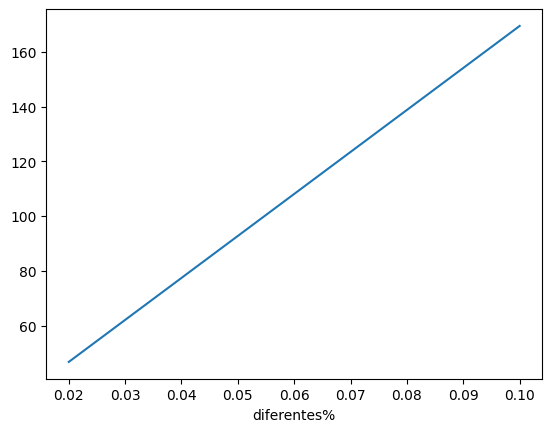

In [ ]:
data['precio_en_udis'].plot()

# ¿Es lineal respecto a la tasa de rendimiento?

In [ ]:
# Que pasa con diferentes tasas de rendimiento:
data2 = pd.DataFrame({'diferentes_tasas_rend' : valores, 'precio_en_udis' : [np.nan]*len(valores), 'precio_en_mxn': [np.nan]*len(valores)})
data2

,diferentes_tasas_rend,precio_en_udis,precio_en_mxn
0,0.020,NaN,NaN
1,0.025,NaN,NaN
2,0.030,NaN,NaN
3,0.035,NaN,NaN
4,0.040,NaN,NaN
5,0.045,NaN,NaN
6,0.050,NaN,NaN
7,0.055,NaN,NaN
8,0.060,NaN,NaN
9,0.065,NaN,NaN


In [ ]:
data2['precio_en_udis'] = data2['diferentes_tasas_rend'].apply(lambda x: precio_en_udis( 0.0105 + 0.04, x, C, DCV, PCV, VN))
data2

,diferentes_tasas_rend,precio_en_udis,precio_en_mxn
0,0.020,111.726536,NaN
1,0.025,104.628347,NaN
2,0.030,98.163354,NaN
3,0.035,92.266161,NaN
4,0.040,86.878728,NaN
5,0.045,81.949496,NaN
6,0.050,77.432620,NaN
7,0.055,73.287292,NaN
8,0.060,69.477156,NaN
9,0.065,65.969783,NaN


<Axes: xlabel='diferentes_tasas_rend'>

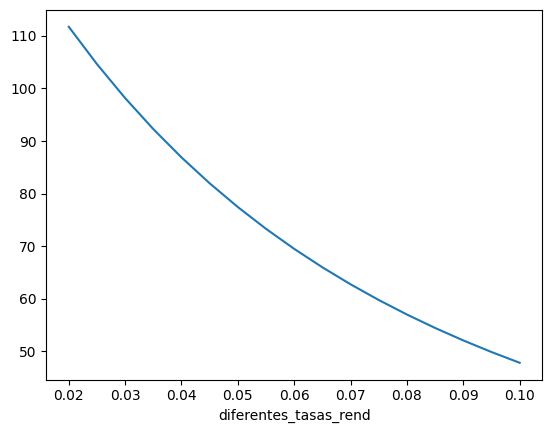

In [ ]:
data2.set_index('diferentes_tasas_rend', inplace=True)
data2.precio_en_udis.plot()

# Ahora, para valuar el bono

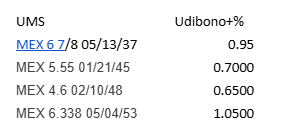

In [ ]:
def valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV):
    precio = 0
    tasa_cupon_periodo = tasa_cupon / frecuencia
    rendimiento_periodo = rendimiento_anual / frecuencia
    cupón = VN * tasa_cupon_periodo
    for i in range(1, num_cupones + 1):
        precio += cupón / (1 + rendimiento_periodo) ** i

    # Descontar el valor nominal al final
    precio += VN / (1 + rendimiento_periodo) ** num_cupones
    precio_limpio = precio - cupón*(DCV/PCV)
    return precio



In [ ]:
# Ejemplo de uso:
VN = 100
tasa_cupon = 0.06338   # 6.338%
rendimiento_anual = 0.045  # 4.5% rendimiento
num_cupones = int(C)
frecuencia = 2  # pagos semestrales

precio = valuar_bono_con_cupones(VN, tasa_cupon, rendimiento_anual, num_cupones, frecuencia, DCV, PCV)



In [ ]:
precio

129.35434089609885

In [ ]:
precio_pesos = precio * 19.30
precio_pesos

2496.5387792947076

In [ ]:
precio_udis = precio * 19.30 / valor_de_udi
precio_udis

295.02413503312664

# Ejercicio: ¿Podemos invertir la misma cantidad de capital y ver cuales serían los flujos en ambos? Sería conveniente ver todo al final en pesos, dolares o UDIS

In [ ]:
# Espacio para ejercicio